In [10]:
# %%
# Python standard library
import math
import random

# custom utils
from utils import display_maze
from examples.dense_maze_4x3 import maze

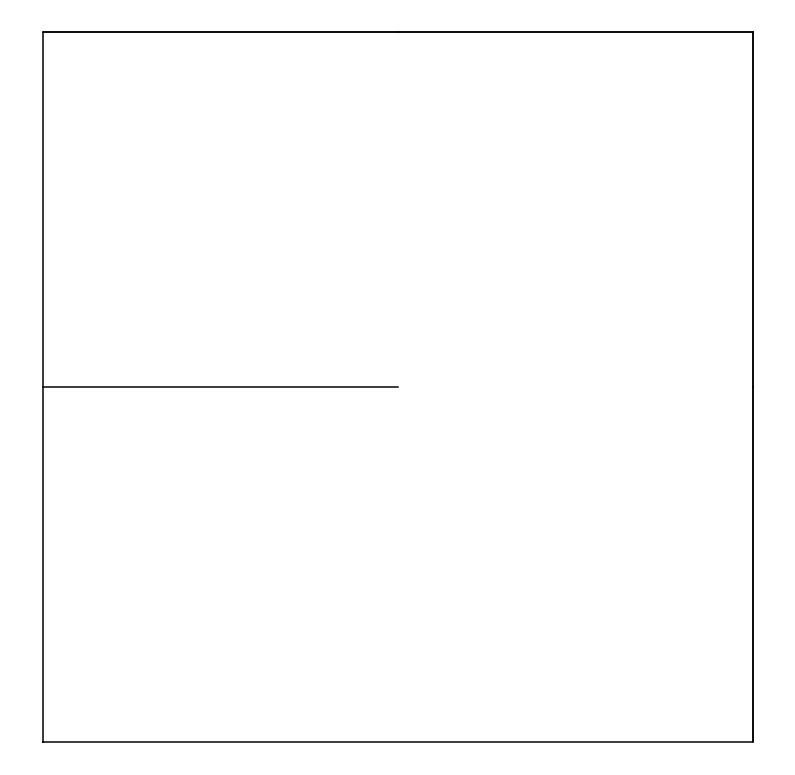

In [17]:
# Votre code ici !


vertices = set([ (0, 0), (1, 0), (0, 1), (1, 1) ])

edges = set([ ( (0,0), (1, 0) ),
( (1, 0), (0, 0) ),
((1, 0), (1, 1)),
((1, 1), (1, 0)),
((1, 1), (0, 1)),
((0, 1), (1, 1)) ])

weights = {((0, 0), (1, 0)): 1, ((1, ), (0, 0)): 1}
display_maze((vertices, edges, weights))




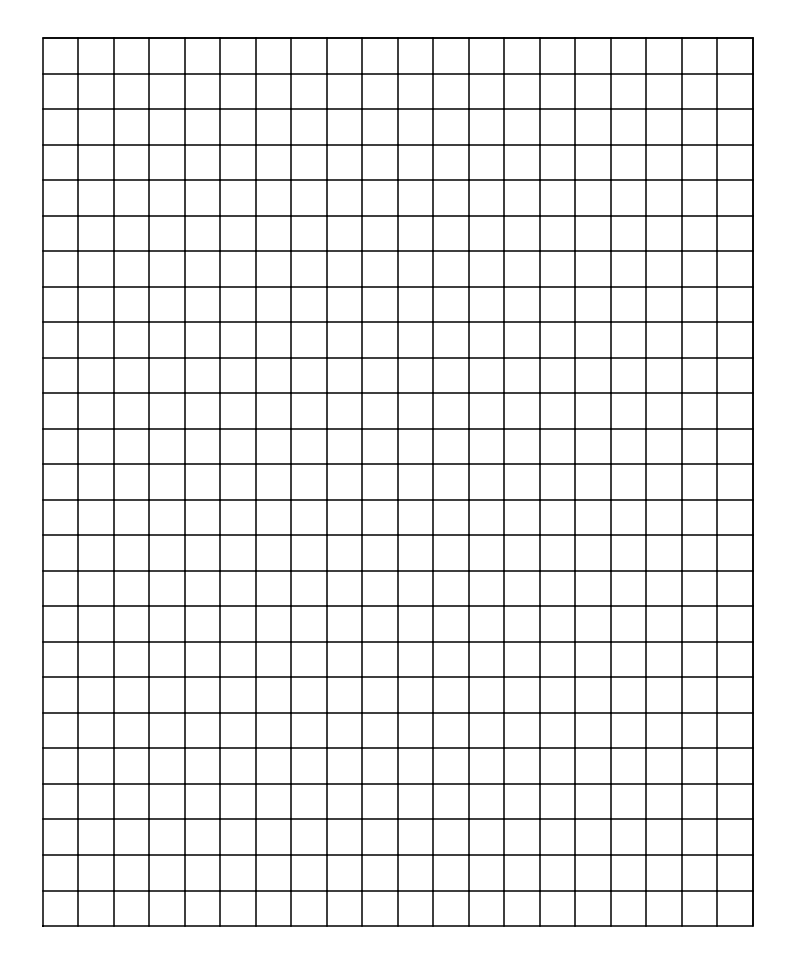

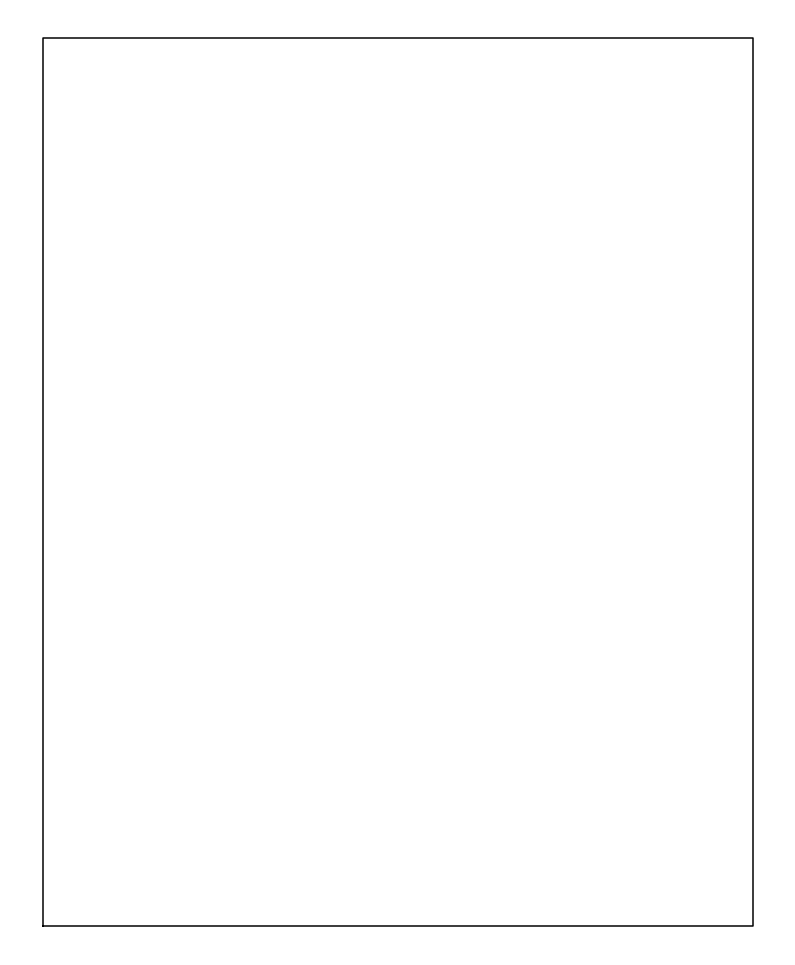

In [38]:
from itertools import product

def full_maze(width, height):
    vertices = set(product(range(width), range(height)))
    edges = set()
    weights = {}
    return vertices, edges, weights
    

display_maze(full_maze(20, 25))

def empty_maze(width, height):
    vertices = set(product(range(width), range(height)))
    edges = set()
    for w, h in vertices:
        edges.add(((w, h), (w+1, h)))
        edges.add(((w, h), (w, h+1)))
        edges.add(((w, h), (w-1, h)))
        edges.add(((w, h), (w, h-1)))
    weights = {}
    return vertices, edges, weights


display_maze(empty_maze(4, 5))

def reachable_set(maze, origin):
    reachable = set()
    